# Twitter分析

つぶやきを集計して簡単にビジュアライズします。    
各スクリプトはMongoDBに接続可能な状態で実行してください。   

## 時系列分析
過去7日間における時間帯ごとのつぶやき数を集計し、プロットします。  
集計単位は下記のとおりです。  
- 1時間ごと
- 日ごと
- 時間帯別

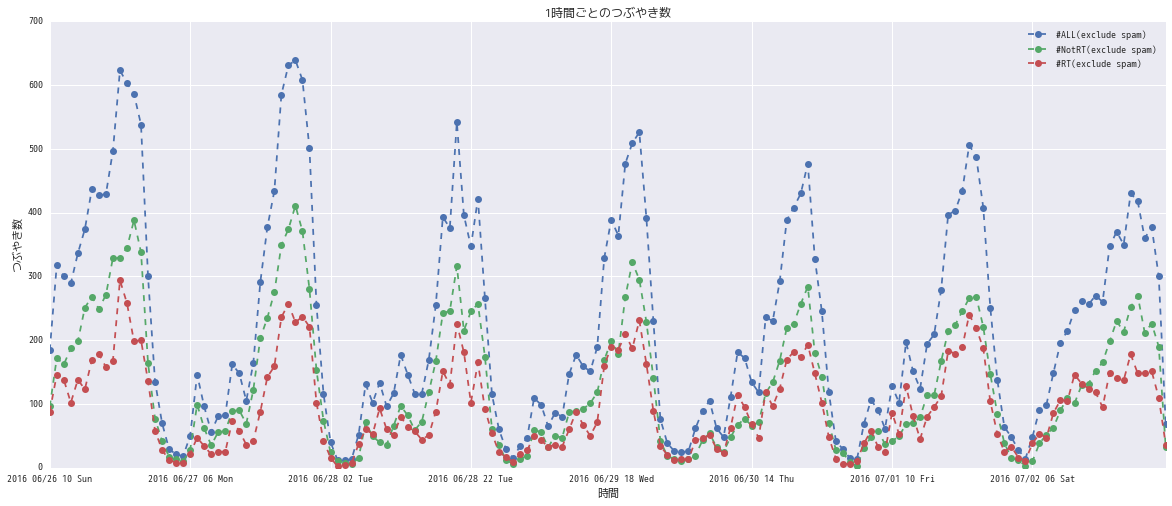

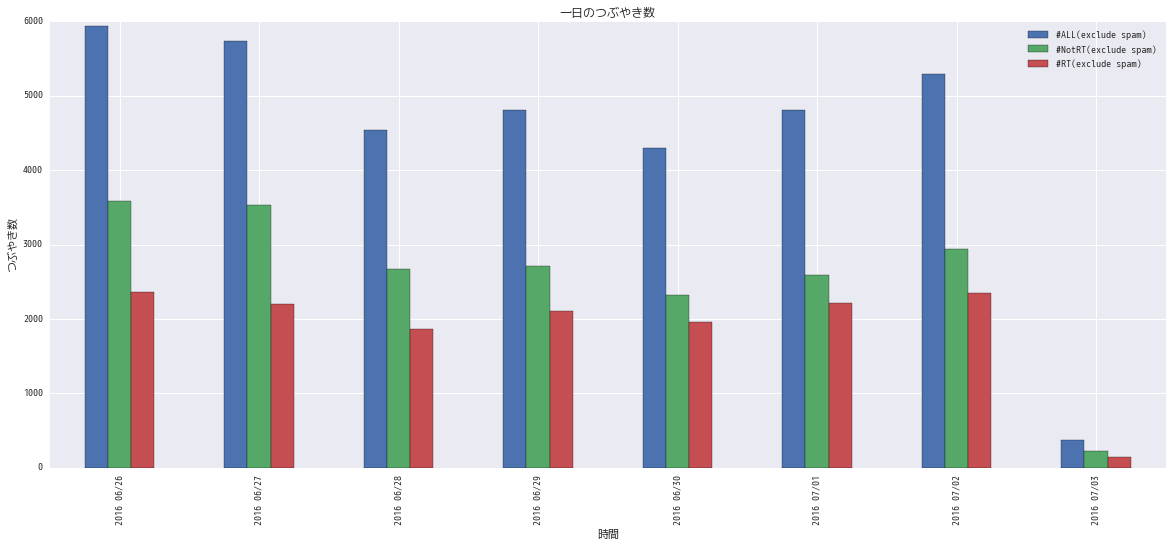

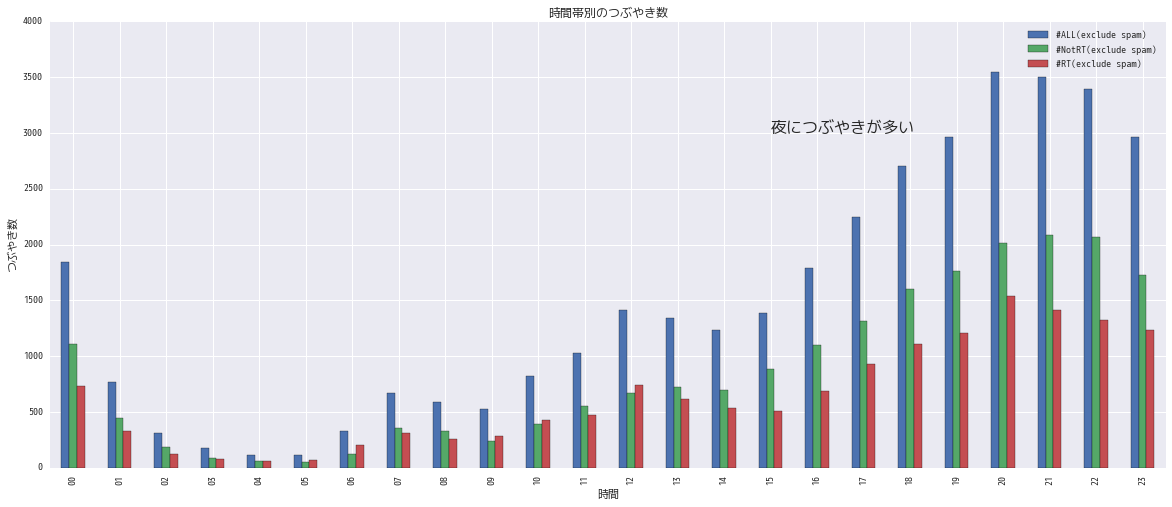

In [1]:
%matplotlib inline
from _datetime import *
import matplotlib.pyplot as plt
import seaborn as sns
from time_series import *

plt.rcParams['font.family'] = 'Migu 1M'# 日本語フォントの設定

# ここの部分のコメントアウトを外して実行すると、使用可能な（インストールされている）フォントが表示されます。
# 必要に応じて、適当な日本語フォントに設定し直してださい。
"""
import matplotlib as mpl
font_paths = mpl.font_manager.findSystemFonts()
font_objects = mpl.font_manager.createFontList(font_paths)
font_names = [f.name for f in font_objects]
print(font_names)
"""

today = datetime.today()
condition = {'created_datetime': {'$gte': today - timedelta(days=7), '$lte': today}}# 過去一週間以内の全ツィートを検索対象とする。

# 1時間ごとのつぶやき数
df = get_time_series_data(condition, '%Y %m/%d %H %a')
df.plot(y=['#ALL(exclude spam)', '#NotRT(exclude spam)', '#RT(exclude spam)'], linestyle='dashed', marker='o', figsize=(20, 8))
plt.title('1時間ごとのつぶやき数')
plt.xlabel('時間')
plt.ylabel('つぶやき数')
plt.show()

# 日ごとのつぶやき数
df = get_time_series_data(condition, '%Y %m/%d')
df.plot(kind='bar', y=['#ALL(exclude spam)', '#NotRT(exclude spam)', '#RT(exclude spam)'], figsize=(20, 8))
plt.title('一日のつぶやき数')
plt.xlabel('時間')
plt.ylabel('つぶやき数')
plt.show()

# 時間帯別のつぶやき数
df = get_time_series_data(condition, '%H')
df.plot(kind='bar', y=['#ALL(exclude spam)', '#NotRT(exclude spam)', '#RT(exclude spam)'], figsize=(20, 8))
plt.text(15, 3000, '夜につぶやきが多い', fontsize=16)
plt.title('時間帯別のつぶやき数')
plt.xlabel('時間')
plt.ylabel('つぶやき数')
plt.show()

## 本日のツィート
今日のつぶやき（素データ）を最大1000件表示します。  

In [2]:
import pandas as pd
from pandas import DataFrame

from db import *
from date_ext import *


# 最大1000ツィートまで表示するように設定。
pd.options.display.max_rows = 1000 

tweet_collection = connect_tweet_collection()
date_format = '%Y/%m/%d %a %H:%M:%S'
today = datetime.today()
condition = {'retweeted_status': {'$eq': None},
             'created_datetime': {'$gte': today - timedelta(days=1), '$lte': today}}# 今日のツィートを検索対象とする。

results = [
    {'日付': date_to_japan_time(tweet['created_datetime']).strftime(date_format),
     'リツィート回数': tweet['retweet_count'],
     'ユーザー名': tweet['user']['screen_name'], 
     'つぶやき': tweet['text']}
    for tweet in tweet_collection.find(condition, {'created_datetime': 1, 'retweet_count': 1, 'id': 1, 'user': 1, 'text': 1})]

DataFrame(results, columns=['日付', 'リツィート回数', 'ユーザー名', 'つぶやき']).sort_values(by='日付', ascending=False).reset_index(drop=True)

,日付,リツィート回数,ユーザー名,つぶやき
0,2016/07/03 Sun 01:17:22,0,sixties_airline,実家にて、パソコンに私の写真が入ってるだが、このパソコンを近々義理妹に譲るらしく、写真をどう...
1,2016/07/03 Sun 01:16:27,0,rin_mikaze,すいません💦\n前回のネットプリントの絵で結構塗りミスしてたので、新しく登録し直しました💦\...
2,2016/07/03 Sun 01:16:24,0,gaana_matu,2日かけてネットプリントしてきました！\n可愛くて、綺麗な絵ばっかりでめっちゃ嬉しい！！\n...
3,2016/07/03 Sun 01:15:39,0,294sky00all,ネットプリントのありがとうしたい
4,2016/07/03 Sun 01:15:32,0,chrome12223,ネットプリントってさ､自分でも簡単に画像選んで出来るから､裏を返せば勝手に保存したイラストを...
5,2016/07/03 Sun 01:14:58,2,matsu_bomaYe,WWE日本公演来日スーパースターまとめのネットプリントは終了しました。ありがとうございました...
6,2016/07/03 Sun 01:12:34,0,bonyari_marma,【相互様限定】色味を見るためにネットプリント登録しました～！グッズに流用の可能性があるので全...
7,2016/07/03 Sun 01:11:52,0,MoinaHittoYahaa,他ジャンル（主に松）めっちゃネットプリントやってない……？私もフォロワ〜～さんのやりたいよ〜...
8,2016/07/03 Sun 01:11:34,0,mame_hiw,セブンで印刷するアレ流行ってるね？
9,2016/07/03 Sun 01:11:19,0,osomatu134,@kuro_0428 \nあーあーあー！！！私も幸せです😊💦💦💦💦💦\n私はくろさんのネット...
